### scikit-learn 中的SVM

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y < 2, : 2]
y = y[y < 2]

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


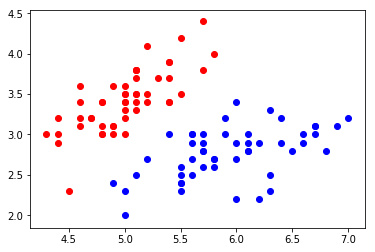

In [5]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()
stand.fit(X)
X_stand = stand.transform(X)

In [8]:
# SVC: support vector classify 
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_stand, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [9]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[3], axis[2], int((axis[3] - axis[2]) * 100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

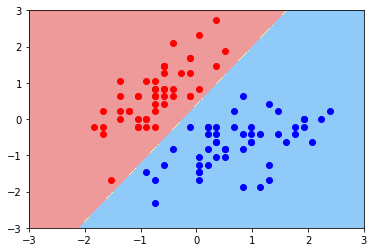

In [11]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_stand[y==0, 0], X_stand[y==0, 1], color='r')
plt.scatter(X_stand[y==1, 0], X_stand[y==1, 1], color='b')
plt.show()

In [12]:
# c 越小，容错越大
svc2 = LinearSVC(C=0.01)
svc2.fit(X_stand, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

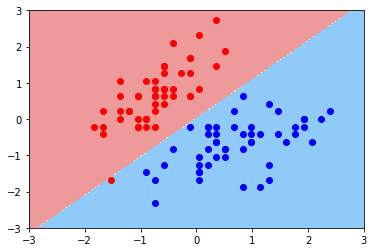

In [13]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_stand[y==0, 0], X_stand[y==0, 1], color='r')
plt.scatter(X_stand[y==1, 0], X_stand[y==1, 1], color='b')
plt.show()

In [14]:
svc.coef_

array([[ 4.03239339, -2.50700152]])

In [15]:
svc.intercept_

array([0.92733469])

In [20]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[3], axis[2], int((axis[3] - axis[2]) * 100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    # 绘制margin 的两条边界
    w = model.coef_[0]
    b = model.intercept_[0]
    # 此时对应的直线为w0 * x0 + w1 * x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    # 对应的边界直线为 w0 * x0 + w1 * x1 + b = +/- 1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    # 此处为防止越界
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='b')
    plt.plot(plot_x[down_index], down_y[down_index], color='b')

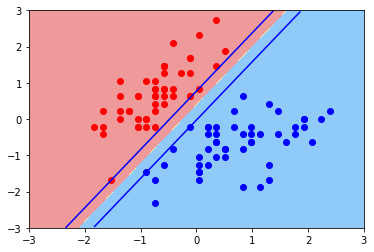

In [21]:
# hard svm
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_stand[y==0, 0], X_stand[y==0, 1], color='r')
plt.scatter(X_stand[y==1, 0], X_stand[y==1, 1], color='b')
plt.show()

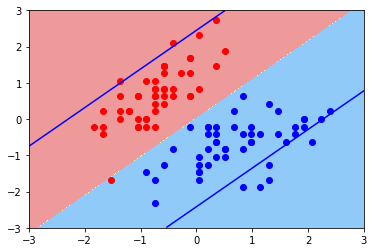

In [22]:
# soft svm
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_stand[y==0, 0], X_stand[y==0, 1], color='r')
plt.scatter(X_stand[y==1, 0], X_stand[y==1, 1], color='b')
plt.show()